# Full Code Version 4
This script will contain the full code for the SU2 local mesh refinement.

**Installing the correct packages** <br>
To connect Paraview with Python some additional packages need to be installed. This only needs to be done once, then they can be commented out.

In [1]:
#conda install -c anaconda vtk

In [2]:
#pip install pyvistaqt

**Importing the required packages** <br>
The packages below need to be loaded in for the rest of the code to work.

In [32]:
import numpy as np
import pyvista as pv
from pyvista import examples
import vtk
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pyvistaqt as pvqt
import math
import os

**Renaming the original mesh file** <br>
The original mesh file is renamed to 'original_mesh.su2'. This is done to make sure the new mesh can be saved without overwritting the original mesh, and that SU2 can easily run the simulation again.

In [33]:
# path of the file
old_name = r"C:\\Users\\20192167\\Documents\\Boeken\\BEP\\SU2-master\\SU2-master\\QuickStart\\mesh_NACA0012_inv.su2"
new_name = r"C:\\Users\\20192167\\Documents\\Boeken\\BEP\\SU2-master\\SU2-master\\QuickStart\\original_mesh.su2"

# Renaming the file
os.rename(old_name, new_name)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\\\Users\\\\20192167\\\\Documents\\\\Boeken\\\\BEP\\\\SU2-master\\\\SU2-master\\\\QuickStart\\\\mesh_NACA0012_inv.su2' -> 'C:\\\\Users\\\\20192167\\\\Documents\\\\Boeken\\\\BEP\\\\SU2-master\\\\SU2-master\\\\QuickStart\\\\original_mesh.su2'

**Loading in the SU2 data** <br>
The results from the SU2 flow analysis are loaded in with the code below. The flow analysis contains several data variables, each assigned to a different Python variable.

In [5]:
pd = pv.read('C:/Users/20192167/Documents/Boeken/BEP/Square SU2 Mesh/flow.vtu')
pd

UnstructuredGrid (0x1b9da378ee0)
  N Cells:	32385
  N Points:	32768
  X Bounds:	0.000e+00, 3.000e+00
  Y Bounds:	0.000e+00, 1.000e+00
  Z Bounds:	0.000e+00, 0.000e+00
  N Arrays:	7

In [6]:
density = pd['Density'].copy()
momentum = pd['Momentum'].copy() #is een 3 by 5428 array... hoe visualizeren?
energy = pd['Energy'].copy()
pressure = pd['Pressure'].copy()
temperature = pd['Temperature'].copy()
mach = pd['Mach'].copy()
pressure_coefficient = pd['Pressure_Coefficient'].copy()

In [7]:
density

array([1.2252824, 1.2252822, 1.2252824, ..., 1.2252047, 1.2252061,
       1.2252079], dtype=float32)

In [8]:
momentum

array([[ 4.1410881e+01, -1.5274651e-06,  0.0000000e+00],
       [ 4.1410755e+01,  1.1087908e-06,  0.0000000e+00],
       [ 4.1410343e+01, -5.0275207e-07,  0.0000000e+00],
       ...,
       [ 4.1672722e+01,  4.5736262e-05,  0.0000000e+00],
       [ 4.1665878e+01,  2.2267716e-04,  0.0000000e+00],
       [ 4.1660473e+01, -2.6798688e-04,  0.0000000e+00]], dtype=float32)

In [9]:
energy

array([253971.05, 253971.02, 253971.05, ..., 253957.5 , 253957.73,
       253958.03], dtype=float32)

In [10]:
pressure

array([101308.51 , 101308.49 , 101308.516, ..., 101299.516, 101299.7  ,
       101299.9  ], dtype=float32)

In [11]:
temperature

array([288.03156, 288.03156, 288.0316 , ..., 288.02426, 288.02444,
       288.02457], dtype=float32)

In [12]:
mach

array([0.09933662, 0.09933634, 0.09933533, ..., 0.09997234, 0.09995577,
       0.09994262], dtype=float32)

In [13]:
pressure_coefficient

array([ 4.7995351e-04,  4.7919163e-04,  4.8028262e-04, ...,
       -2.7216282e-05, -1.6732212e-05, -5.6396084e-06], dtype=float32)

**Visualizing the distribution**

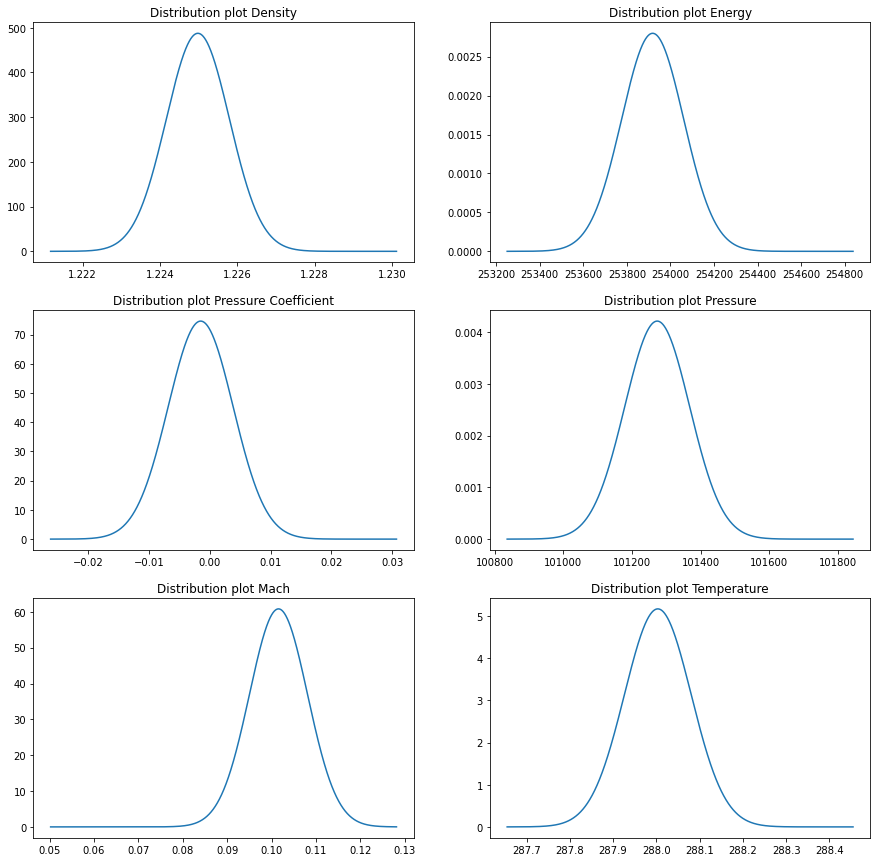

In [14]:
fig, axs = plt.subplots(3, 2, figsize=(15,15))

density.sort()
mean = np.mean(density)
std = np.std(density)
axs[0,0].plot(density, norm.pdf(density, mean, std))
axs[0,0].set_title("Distribution plot Density")


energy.sort()
mean = np.mean(energy)
std = np.std(energy)
axs[0, 1].plot(energy, norm.pdf(energy, mean, std))
axs[0, 1].set_title("Distribution plot Energy")

pressure.sort()
mean = np.mean(pressure)
std = np.std(pressure)
axs[1, 1].plot(pressure, norm.pdf(pressure, mean, std))
axs[1, 1].set_title("Distribution plot Pressure")

temperature.sort()
mean = np.mean(temperature)
std = np.std(temperature)
axs[2, 1].plot(temperature, norm.pdf(temperature, mean, std))
axs[2, 1].set_title("Distribution plot Temperature")

mach.sort()
mean = np.mean(mach)
std = np.std(mach)
axs[2, 0].plot(mach, norm.pdf(mach, mean, std))
axs[2, 0].set_title("Distribution plot Mach")

pressure_coefficient.sort()
mean = np.mean(pressure_coefficient)
std = np.std(pressure_coefficient)
axs[1, 0].set_title("Distribution plot Pressure Coefficient")
axs[1, 0].plot(pressure_coefficient, norm.pdf(pressure_coefficient, mean, std))

**Visualizing the Data in Paraview** (Example Temperature)<br>
The code below can be used to vizualize the SU2 results in Paraview.

In [15]:
data_variable = 'Energy' # 'Density', 'Energy' 'Momentum', 'Temperature', 'Pressure', 'Mach', 'Pressure_Coefficient'

# Define the colors we want to use
green = np.array([200/256, 247/256, 0/256, 1])
greenblue = np.array([12/256, 238/256, 200/256, 1])
blue = np.array([12/256, 238/256, 246/256, 1])
darkblue = np.array([12/256, 150/256, 246/256, 1])
purple= np.array([200/256, 50/256, 246/256, 1])
pink= np.array([250/256, 50/256, 246/256, 1])
lightpink = np.array([250/256, 50/256, 246/256, 0.7])
orange = np.array([250/256, 150/256, 0/256, 0.7])
yelloworange = np.array([250/256, 200/256, 0/256, 0.7])
yellow = np.array([255/256, 247/256, 0/256, 1])
grey = np.array([189/256, 189/256, 189/256, 1])

Data_Variable = np.linspace(pd[data_variable].min(), pd[data_variable].max(), 256)

colorscale= [np.percentile(Data_Variable, 100), np.percentile(Data_Variable, 90),np.percentile(Data_Variable, 80),np.percentile(Data_Variable, 70),np.percentile(Data_Variable, 60),np.percentile(Data_Variable, 50),np.percentile(Data_Variable, 40),np.percentile(Data_Variable, 30),np.percentile(Data_Variable, 20),np.percentile(Data_Variable, 10),np.percentile(Data_Variable, 0)]

newcolors = np.empty((256, 4))
newcolors[Data_Variable >= colorscale[10]] = green
newcolors[Data_Variable > colorscale[9]] = greenblue
newcolors[Data_Variable > colorscale[8]] = blue
newcolors[Data_Variable > colorscale[7]] = darkblue
newcolors[Data_Variable > colorscale[6]] = purple
newcolors[Data_Variable > colorscale[5]] = pink
newcolors[Data_Variable > colorscale[4]] = lightpink
newcolors[Data_Variable > colorscale[3]] = orange
newcolors[Data_Variable > colorscale[2]] = yelloworange
newcolors[Data_Variable > colorscale[1]] = yellow
newcolors[Data_Variable >= colorscale[0]] = grey

my_colormap = ListedColormap(newcolors)

pl = pvqt.BackgroundPlotter()
pl.set_background('white')
pv.global_theme.font.color = 'black'
pl.add_mesh(pd, show_edges=True, line_width=0.5,scalars=data_variable,
            cmap=my_colormap,clim=[colorscale[10], colorscale[0]])
pl.camera_position = 'xy'
pl.show()

**Sorting the data per cell** (Example Temperature) <br>
To make sure that the correct cells can be indicated an average per cell will be calculated. 'data_variable' indicated the variable you wish to base your local mesh refinement on. 

In [16]:
cells=pd.cells
points=pd.points

Centers = []
cellsC = cells

while True:
    if cellsC[0]==3:
        a = cellsC[1]
        b = cellsC[2]
        c = cellsC[3]
        
        C = (pd[data_variable][a]+pd[data_variable][b] +pd[data_variable][c])/3
        Centers.append(C[0])
        cellsC = cellsC[4:]
        
    elif cellsC[0]==4:
        a = cellsC[1]
        b = cellsC[2]
        c = cellsC[3]
        d = cellsC[4]
        
        C = (pd[data_variable][a]+pd[data_variable][b] +pd[data_variable][c]+pd[data_variable])/4
        Centers.append(C[0])
        cellsC = cellsC[5:]
    
    if len(cellsC) == 0:
        break

**Determining which cells should be refined** <br>
Based on the visualizations above the user can determine the variable on which the local mesh refinement should be based. Then the code below can be used to for filter the cells based on that data variable. This can be done with a minimum or maximum value filter or with a minimum or maximum percentage filter. 

In [17]:
Index = []
Option= 2 # 1=min or max value, 2 = min or max percentage

if Option == 1:
    for x in range(0, len(Centers)):
        if Centers[x] <= 100000:
            Index.append(x)
            
elif Option == 2:
    margin = np.percentile(Centers, 90)

    for x in range(0, len(Centers)):
        if Centers[x] >= margin:
            Index.append(x)

**Loading in the SU2 mesh file** <br>
Next the original SU2 mesh file will be loaded into Python. It will detect whether it is a square or triangular mesh. Additionally, the code will be prepared for processing.

In [18]:
f = open(new_name, 'r')


# first get the dimensions
line = f.readline()
columns = line.split()
print(columns)

NDIME = columns[1]
print("dimensions = ",NDIME)

# then, get the nr of elements
line = f.readline()
columns = line.split()

NELEM=columns[1]
print("nr of elements=",NELEM)

line=f.readline()
columns = line.split()
meshtype=int(columns[0])

if meshtype==5:
    # create the 2D triangle array
    connectivity = np.arange(4*int(NELEM),dtype=np.int32)
    connectivity = connectivity.reshape(int(NELEM),4)
    
    i=0
    connectivity[i][:]=[int(3), int(columns[1]), int(columns[2]), int(columns[3])]
    
    # now, read all the elements into a structure
    for i in range(int(NELEM)-1):
        i=i+1
        line=f.readline()
        columns = line.split()
        connectivity[i][:]=[int(3), int(columns[1]), int(columns[2]), int(columns[3])]
    
elif meshtype==9:
    # create the 2D square array
    connectivity = np.arange(5*int(NELEM),dtype=np.int32)
    connectivity = connectivity.reshape(int(NELEM),5)
    
    i=0
    connectivity[i][:]=[int(4), int(columns[1]), int(columns[2]), int(columns[3]), int(columns[4])]
    
    # now, read all the elements into a structure
    for i in range(int(NELEM)-1):
        i=i+1
        line=f.readline()
        columns = line.split()
        connectivity[i][:]=[int(4), int(columns[1]), int(columns[2]), int(columns[3]), int(columns[4])]

print("end reading elements")
# then, get the coordinates
line = f.readline()
columns = line.split()

NPOIN=columns[1]
print("nr of points=",NPOIN)

# create the 2D point array
points = np.arange(2*int(NPOIN),dtype=np.float64).reshape(int(NPOIN),2)
# now, read all the points into a structure
for i in range(int(NPOIN)):
    line=f.readline()
    columns = line.split()
    points[i][0]=float(columns[0])
    points[i][1]=float(columns[1])

# now, read the markers
line = f.readline()
columns = line.split()

NMARK=columns[1]
print("nr of markers=",NMARK)

# name of the marker (list of strings)
markername = []
# number of elements in the marker (list of integers)
markerelements = np.arange(int(NMARK),dtype=np.int32)
# this is the list of numpy arrays
markers = []

# list of marker points
markerpointslist = []

for m in range(int(NMARK)):
    line = f.readline()
    columns = line.split()
    markername.append(columns[1])
    print(" ",m,": marker name=",markername[m])
    line = f.readline()
    columns = line.split()
    markerelements[m] = int(columns[1])   
    print(" marker elements=",markerelements[m])
    markerarray = np.arange(2*int(markerelements[m])).reshape(int(markerelements[m]),2)

    for i in range(int(markerelements[m])):
        line=f.readline()
        columns = line.split()
        markerarray[i][0]=columns[1]
        markerarray[i][1]=columns[2]
        
    # now add the array to the list of markers
    markers.append(markerarray)

print("Finished reading su2 file.") 

['NDIME=', '2']
dimensions =  2
nr of elements= 32385
end reading elements
nr of points= 32768
nr of markers= 4
  0 : marker name= inlet
 marker elements= 127
  1 : marker name= lower_wall
 marker elements= 255
  2 : marker name= outlet
 marker elements= 127
  3 : marker name= upper_wall
 marker elements= 255
Finished reading su2 file.


In [19]:
connectivity

array([[    4,     0,     1,   257,   256],
       [    4,     1,     2,   258,   257],
       [    4,     2,     3,   259,   258],
       ...,
       [    4, 32508, 32509, 32765, 32764],
       [    4, 32509, 32510, 32766, 32765],
       [    4, 32510, 32511, 32767, 32766]])

In [20]:
n = int(NPOIN)
z = np.zeros((n, 1))
p = np.append(points, z, axis=1)
points = p
points

array([[0.        , 0.        , 0.        ],
       [0.01      , 0.        , 0.        ],
       [0.01990219, 0.        , 0.        ],
       ...,
       [2.98011061, 1.        , 0.        ],
       [2.99      , 1.        , 0.        ],
       [3.        , 1.        , 0.        ]])

In [21]:
markers0 = markers.copy()

**Visualizing the mesh with Paraview** <br>
The original mesh will be visualized with Paraview to later confirm the refinement of the desired cells.

In [22]:
mesh = pv.PolyData(points, connectivity)
pl = pvqt.BackgroundPlotter()
pl.add_mesh(mesh, show_edges=True, line_width=0.05, color='#EEEEEE')
pl.set_background('white')
#pl.add_point_labels(points, [f'Point {i}' for i in range(5)],always_visible=True,
#                    font_size=20,text_color='white', point_size=20,point_color='red',render_points_as_spheres=True)
pl.camera_position = 'xy'
pl.show()

**Mesh Quality of the original mesh** <br>
Before refining the mesh, the mesh quality of the original mesh will be determined.

In [23]:
if connectivity[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
    qe = 60
    
elif connectivity[0][0] == 4: #is the mesh is square
    z1 = 4
    z2 = 6
    qe = 90
    z3 = 2

q = len(connectivity) #Total number of cells
p = [] #A temporary array to store the points of the cell of interest
i = 0

#----------------------------------------------------------------------------#
#-----------------Aspect Ratio-----------------------------------------------#
#----------------------------------------------------------------------------#

aspect_ratio_original = []
distance = [] #A temporary array containing the lenghts of the edges

for y in range(0,q):
    for x in range(1,z2):
        if i < z1:
            a = points[connectivity[y][x]]
            p.append(a)
            i = i+1
        elif i == z1:
            for x in range(0,z1):
                l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                distance.append(d)
            ar = min(distance)/max(distance)
            aspect_ratio_original.append(ar)
            i = 0
            p =[]
            distance = []

i = 0
Skewness_original = []
distance = []

for y in range(0,q):
    for x in range(1,z2):
        if i < z1:
            a = points[connectivity[y][x]]
            p.append(a)
            i = i+1
        elif i == z1:
            
            if z1 ==3:
                for x in range(0,z1):
                    l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                    d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d)
                a = distance[1]
                b = distance[2]
                c = distance[0]
                alpha = math.degrees(math.acos((a**2-b**2-c**2)/(-2*b*c))) #calculates the angles of the corners
                beta = math.degrees(math.acos((b**2-c**2-a**2)/(-2*c*a)))
                gamma = math.degrees(math.acos((c**2-b**2-a**2)/(-2*b*a)))
                qmin = min(alpha, beta, gamma) #determines the minimal angle
                qmax = max(alpha, beta, gamma) #determines the maximal angle
                
            elif z1 == 4:
                for x in range(0,z1):
                    l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                    d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d)
                a = distance[0]
                b = distance[1]
                c = distance[2]
                d = distance[3]
                
                for x in range(0,z3):
                    l = abs(p[x%z1]-p[(x+2)%z1]) # calculates the difference in x and y coordinates of the points
                    d2 = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d2)
                    
                e = distance[4]
                f = distance[5]
                alpha1 = math.degrees(math.acos((b**2-e**2-a**2)/(-2*e*a))) #calculates the angles of the corners
                alpha2 = math.degrees(math.acos((d**2-f**2-c**2)/(-2*f*c)))
                beta = math.degrees(math.acos((e**2-a**2-b**2)/(-2*a*b)))
                gamma1 = math.degrees(math.acos((a**2-e**2-b**2)/(-2*e*b)))
                gamma2 = math.degrees(math.acos((c**2-d**2-f**2)/(-2*d*f)))
                gamma = gamma2+alpha2
                alpha = gamma1+alpha1
                delta = math.degrees(math.acos((f**2-d**2-c**2)/(-2*d*c)))
                qmin = min(alpha, beta, gamma, delta) #determines the minimal angle
                qmax = max(alpha, beta, gamma, delta) #determines the maximal angle
            skewness = max((qmax-qe)/(180-qe), (qe-qmin)/qe) 
            Skewness_original.append(skewness)
            i = 0
            p =[]
            distance = []
            

len_cells = len(connectivity) #the total number of cells in the mesh
len_points = len(points)
Orthogonality_original = []

if z1 ==3: #if triangle
    for y in range(0,len_cells):
        p=[]
        i = 0
        
        d = connectivity[y][1]
        e = connectivity[y][2]
        f = connectivity[y][3]
    
        for x in range(1,5):
            if i < z1:
                a = points[connectivity[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                center = (p[0]+p[1]+p[2])/3
                point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
                point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
                point3 = ((points[d]+points[f])/2) #creating a additional point in the middle of the third edge of the side 
                
                e1= point1-center #center to point1
                e2= point2-center #center to point2
                e3= point3-center #center to point3
                vectors_e = [e1[:2],e2[:2],e3[:2]]
                
                v1= points[e]-points[d]
                v2= points[f]-points[e]
                v3= points[d]-points[f]
                
                #v=(a,b) u=(b,-a) #perpendicular
                A1= (v1[1],-v1[0]) #perpendicular to side de
                A2= (v2[1],-v2[0])#perpendicular to side ef
                A3= (v3[1],-v3[0])#perpendicular to side fd
                vectors_A=[A1,A2,A3]
                
                orth = []
                for o in range(0,3):
                    dot_e_A = abs((vectors_A[o][0]*vectors_e[o][0])+(vectors_A[o][1]*vectors_e[o][1]))
                    magnitude_e = math.sqrt((vectors_e[o][0])**2+(vectors_e[o][1])**2)
                    magnitude_A = math.sqrt((vectors_A[o][0])**2+(vectors_A[o][1])**2)
                    ort = (dot_e_A)/(magnitude_e*magnitude_A)
                    orth.append(ort)
                Orthogonality_original.append(min(orth))

                                        
elif z1==4: #if square

    for y in range(0,len_cells):
        p=[]
        i = 0
        
        d = connectivity[y][1]
        e = connectivity[y][2]
        f = connectivity[y][3]
        g = connectivity[y][4]
        
        for x in range(1,6):
            if i < z1:
                a = points[connectivity[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                center = (p[0]+p[1]+p[2]+p[3])/4
                point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
                point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
                point3 = ((points[g]+points[f])/2) #creating a additional point in the middle of the third edge of the side
                point4 = ((points[f]+points[d])/2) #creating a additional point in the middle of the third edge of the side
                
                e1= point1-center #center to point1
                e2= point2-center #center to point2
                e3= point3-center #center to point3
                e4= point4-center #center to point4
                vectors_e = [e1[:2],e2[:2],e3[:2], e4[:2]]
                
                v1= points[e]-points[d]
                v2= points[f]-points[e]
                v3= points[g]-points[f]
                v4= points[d]-points[g]
                
                #v=(a,b) u=(b,-a) #perpendicular
                A1= (v1[1],-v1[0]) #perpendicular to side de
                A2= (v2[1],-v2[0])#perpendicular to side ef
                A3= (v3[1],-v3[0])#perpendicular to side fg
                A4= (v4[1],-v4[0])#perpendicular to side gd
                vectors_A=[A1,A2,A3,A4]
                
                orth = []
                for o in range(0,4):
                    dot_e_A = abs((vectors_A[o][0]*vectors_e[o][0])+(vectors_A[o][1]*vectors_e[o][1]))
                    magnitude_e = math.sqrt((vectors_e[o][0])**2+(vectors_e[o][1])**2)
                    magnitude_A = math.sqrt((vectors_A[o][0])**2+(vectors_A[o][1])**2)
                    ort = (dot_e_A)/(magnitude_e*magnitude_A)
                    orth.append(ort)
                Orthogonality_original.append(min(orth))

      
        
print('The average Aspect Ratio of the original mesh is', round(sum(aspect_ratio_original)/len(aspect_ratio_original),3))
print('The minimum Aspect Ratio of the original mesh is', round(min(aspect_ratio_original),3))
print('the maximum Aspect Ratio of the original mesh is', round(max(aspect_ratio_original),3))

print('The average Skewness of the original mesh is', round(sum(Skewness_original)/len(Skewness_original),3))
print('The minimum Skewness of the original mesh is', round(min(Skewness_original),3))
print('the maximum Skewness of the original mesh is', round(max(Skewness_original),3))

print('The average Face Orthogonality of the mesh is', round(sum(Orthogonality_original)/len(Orthogonality_original),3))
print('The minimum Face Orthogonality of the mesh is', round(min(Orthogonality_original),3))
print('The maximum Face Orthogonality of the mesh is', round(max(Orthogonality_original),3))      

The average Aspect Ratio of the original mesh is 0.582
The minimum Aspect Ratio of the original mesh is 0.117
the maximum Aspect Ratio of the original mesh is 1.0
The average Skewness of the original mesh is 0.023
The minimum Skewness of the original mesh is 0.0
the maximum Skewness of the original mesh is 0.187
The average Face Orthogonality of the mesh is 0.284
The minimum Face Orthogonality of the mesh is 0.0
The maximum Face Orthogonality of the mesh is 1.0


C:\Users\20192167\Anaconda3\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


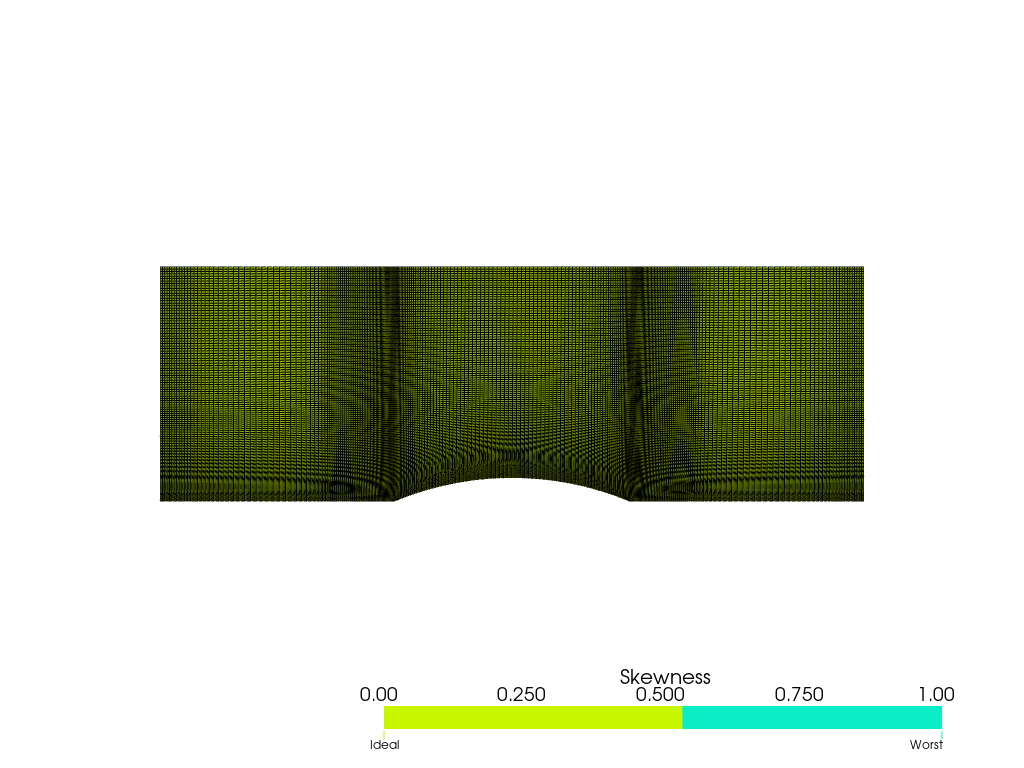

In [24]:
mesh.cell_data['Skewness']= Skewness_original

# Define the colors we want to use
green = np.array([200/256, 247/256, 0/256, 1])
greenblue = np.array([12/256, 238/256, 200/256, 1])
blue = np.array([12/256, 238/256, 246/256, 1])
darkblue = np.array([12/256, 150/256, 246/256, 1])
purple= np.array([200/256, 50/256, 246/256, 1])
pink= np.array([250/256, 50/256, 246/256, 1])
lightpink = np.array([250/256, 50/256, 246/256, 0.7])
orange = np.array([250/256, 150/256, 0/256, 0.7])
yelloworange = np.array([250/256, 200/256, 0/256, 0.7])
yellow = np.array([255/256, 247/256, 0/256, 1])
grey = np.array([189/256, 189/256, 189/256, 1])

skewness = np.linspace(mesh['Skewness'].min(), mesh['Skewness'].max(), 256)
newcolors = np.empty((256, 4))
newcolors[skewness >= 0] = green
#newcolors[skewness > 0.1] = lightgreen
newcolors[skewness > 0.1] = greenblue
newcolors[skewness > 0.2] = blue
newcolors[skewness > 0.3] = darkblue
newcolors[skewness > 0.4] = purple
newcolors[skewness > 0.5] = pink
newcolors[skewness > 0.6] = lightpink
newcolors[skewness > 0.7] = orange
newcolors[skewness > 0.8] = yelloworange
newcolors[skewness > 0.9] = yellow
newcolors[skewness >= 1] = grey

my_colormap = ListedColormap(newcolors)
annotations = {
    1: "Worst",
    0: "Ideal",
}

pl = pv.Plotter()
pl.set_background('white')
pv.global_theme.font.color = 'black'
pl.add_mesh(mesh, show_edges=True, line_width=0.5,scalars='Skewness',
            cmap=my_colormap, annotations=annotations,clim=[0, 1])
pl.camera_position = 'xy'
pl.show()

**Refining the mesh** <br>


In [25]:
c = Index[:5].copy()
c

[43, 44, 45, 46, 47]

In [26]:
#----------------------------------------------#
#---------Rewritting the cells array-----------#
#----------------------------------------------#
cells=[]
for x in range(0,len(connectivity)):
    for y in range(0, len(connectivity[x])):
        cells.append(connectivity[x][y])

In [27]:
#----------------------------------------------#
#-----------Saving the cell types--------------#
#----------------------------------------------#
cells_type = cells.copy()
Type = []
ytotal = []
ytotaly = []

while True:
    if cells_type[0]==3:
        Type.append(3)
        cells_type= cells_type[4:]
        
    elif cells_type[0]==4:
        Type.append(4)
        cells_type= cells_type[5:]

    if len(cells_type) == 0:
        break

clen = len(c)
c_filtered=c.copy()

#-----------------------------------------------------#
#------------Refining the square cells----------------#
#-----------------------------------------------------#
for cx in range(0,clen):
    cells_refinement=cells.copy()
    i=0
     
    if Type[c[cx]]==4:    
        
        for x in range(0,c[cx]):
            cells_refinement= cells_refinement[(Type[x]+1):]
            i = i + (Type[x]+1)  
        cell_c= cells_refinement[:5]
        
        d1 = cell_c[1]
        d2 = cell_c[2]
        d3 = cell_c[3]
        d4 = cell_c[4]
        
        point1 = ((points[d3]+points[d1])/2) 
        points = np.vstack([points,point1]) #adding the points to the points array
    
        g = len(points) #the new total number of points
        
        cells[i] = 3
        cells[i+1]= d1
        cells[i+2]= d2
        cells[i+3]= (g-1)
        cells= np.delete(cells, [(i+4)],None)
        
        cells = np.append(cells,3)
        cells = np.append(cells,d2)
        cells = np.append(cells,d3)
        cells = np.append(cells,(g-1))
        
        cells = np.append(cells,3)
        cells = np.append(cells,d3)
        cells = np.append(cells,d4)
        cells = np.append(cells,(g-1))
        
        cells = np.append(cells,3)
        cells = np.append(cells,d4)
        cells = np.append(cells,d1)
        cells = np.append(cells,(g-1))
        
        Type[c[cx]]=3
        Type.append(3)
        Type.append(3)
        Type.append(3)
    
        c_filtered[cx] = 'x'

#------------------------------------------------------------------------------#
#----------Creating a new list c with just triangular cells--------------------#
#------------------------------------------------------------------------------#
c_new = [] #a new list with all the triangular cells that should still be refined

for x in range(0, len(c_filtered)):      
    if c_filtered[x] !='x':
        c_new.append(c_filtered[x])

#-------------------------------------------------------------------------------#    
#--------Finding the neighbouring cells of the cells you wish to refine---------#
#-------------------------------------------------------------------------------#
for cx in range(0,len(c_new)):
    cells_refinement=cells.copy()
    i=0
    
    for x in range(0,c_new[cx]): 
        cells_refinement= cells_refinement[(Type[x]+1):]
        i = i + (Type[x]+1)  
        
    if Type[c_new[cx]]==3:
        cell_c= cells_refinement[:4]
        d1 = cell_c[1]
        d2 = cell_c[2]
        d3 = cell_c[3]
        
        #--------------------------------------------#
        #------Finding neigbouring cells-------------#
        #--------------------------------------------#
        
        cells_neighbour = cells.copy()
        w = 0
        y=[]
        while True:

            if cells_neighbour[0]==3:
                cell = cells_neighbour[:4]
                cells_neighbour=cells_neighbour[4:]  

            elif cells_neighbour[0]==4:
                cell = cells_neighbour[:5]
                cells_neighbour=cells_neighbour[5:] 

            if d1 in cell[1:] and d2 in cell[1:]:
                if w not in c_new:
                    y.append(w)
                    ytotaly.append(w)
                    break
                        
            if len(cells_neighbour) == 0:
                y.append(len(Type)+1)
                ytotaly.append(len(Type)+1)
                break
            w=w+1    
                
        cells_neighbour = cells.copy()
        w = 0
        while True:
                
            if cells_neighbour[0]==3:
                cell = cells_neighbour[:4]
                cells_neighbour=cells_neighbour[4:]  

            elif cells_neighbour[0]==4:
                cell = cells_neighbour[:5]
                cells_neighbour=cells_neighbour[5:]
                    
            if d2 in cell[1:] and d3 in cell[1:]:
                if w not in c_new:
                    y.append(w)
                    ytotaly.append(w)
                    break    
                
            if len(cells_neighbour) == 0:
                y.append(len(Type)+1)
                ytotaly.append(len(Type)+1)
                break
            w = w+1
                
        cells_neighbour = cells.copy()
        w = 0   
        while True:
            
            if cells_neighbour[0]==3:
                cell = cells_neighbour[:4]
                cells_neighbour=cells_neighbour[4:]  

            elif cells_neighbour[0]==4:
                cell = cells_neighbour[:5]
                cells_neighbour=cells_neighbour[5:]  
                    
            if d3 in cell[1:] and d1 in cell[1:]:
                if w not in c_new:
                    y.append(w)
                    ytotaly.append(w)
                    break
                        
            if len(cells_neighbour) == 0:
                y.append(len(Type)+1)
                ytotaly.append(len(Type)+1)
                break
            w=w+1    

    ytotal.append(y)       

    
#-------------------------------------------------------------------------#
#---------Finding neighbouring cells that are called for twice------------#
#-------------------------------------------------------------------------#
i=0
c_new_len= len(c_new)
for x in range (0,len(ytotal)): #for every cell listed in {ytotal}
    for z in range(0,3): 
        if ytotal[x][z] in ytotaly[3+i:]: #if the cell is listed again in {ytotal}
            if ytotal[x][z] != len(Type)+1: #if it is not the additional cell added for no connection
                if ytotal[x] not in c_new: #if the cell is not listed in {c}
                    c_new.append(ytotal[x][z]) #add the cell to {c}
                    v =1
            else:
                v=0
        else:
            v =0

    i = i+3    

if c_new_len == len(c_new): #if at least two cells share the same neighbouring cell. The code will be ran again.
    a=1
else:
    a=0

    
while True:
    c_new_len = len(c_new)
    
    if a == 1:
        break
    
    ytotaly=[]
    ytotal = []
    c_filtered=c_new.copy()
    
    for cx in range(0,len(c_new)):
        cells_refinement=cells.copy()
        i=0

        for x in range(0,c_new[cx]):
            cells_refinement= cells_refinement[(Type[x]+1):]
            i = i + (Type[x]+1)  

        if Type[c_new[cx]]==4:
            cell_c= cells_refinement[:5]

            d1 = cell_c[1]
            d2 = cell_c[2]
            d3 = cell_c[3]
            d4 = cell_c[4]

            point1 = ((points[d3]+points[d1])/2) 
            points = np.vstack([points,point1]) #adding the points to the points array

            g = len(points) #the new total number of points

            cells[i] = 3
            cells[i+1]= d1
            cells[i+2]= d2
            cells[i+3]= (g-1)
            cells= np.delete(cells, [(i+4)],None)

            cells = np.append(cells,3)
            cells = np.append(cells,d2)
            cells = np.append(cells,d3)
            cells = np.append(cells,(g-1))

            cells = np.append(cells,3)
            cells = np.append(cells,d3)
            cells = np.append(cells,d4)
            cells = np.append(cells,(g-1))

            cells = np.append(cells,3)
            cells = np.append(cells,d4)
            cells = np.append(cells,d1)
            cells = np.append(cells,(g-1))

            Type[c_new[cx]]=3
            Type.append(3)
            Type.append(3)
            Type.append(3)

            c_filtered[cx] = 'x'

    c_new = []
    for x in range(0, len(c_filtered)):      
        if c_filtered[x] !='x':
            c_new.append(c_filtered[x])
    
    for cx in range(0,len(c_new)):
        cells_refinement=cells.copy()
        i=0

        for x in range(0,c_new[cx]):
            cells_refinement= cells_refinement[(Type[x]+1):]
            i = i + (Type[x]+1)  

        if Type[c_new[cx]]==3:
            cell_c= cells_refinement[:4]
            d1 = cell_c[1]
            d2 = cell_c[2]
            d3 = cell_c[3]
            #--------------------------------------------#
            #------Finding neigbouring cells-------------#
            #--------------------------------------------#

            cells_neighbour = cells.copy()
            w = 0
            y=[]
            while True:

                if cells_neighbour[0]==3:
                    cell = cells_neighbour[:4]
                    cells_neighbour=cells_neighbour[4:]  

                elif cells_neighbour[0]==4:
                    cell = cells_neighbour[:5]
                    cells_neighbour=cells_neighbour[5:] 

                if d1 in cell[1:] and d2 in cell[1:]:
                    if w not in c_new:
                        y.append(w)
                        ytotaly.append(w)
                        break
                        
                if len(cells_neighbour) == 0:
                    y.append(len(Type)+1)
                    ytotaly.append(len(Type)+1)
                    break
                w=w+1    
                
            cells_neighbour = cells.copy()
            w = 0
            while True:
                
                if cells_neighbour[0]==3:
                    cell = cells_neighbour[:4]
                    cells_neighbour=cells_neighbour[4:]  

                elif cells_neighbour[0]==4:
                    cell = cells_neighbour[:5]
                    cells_neighbour=cells_neighbour[5:]
                    
                if d2 in cell[1:] and d3 in cell[1:]:
                    if w not in c_new:
                        y.append(w)
                        ytotaly.append(w)
                        break    
                
                if len(cells_neighbour) == 0:
                    y.append(len(Type)+1)
                    ytotaly.append(len(Type)+1)
                    break
                w = w+1
                
            cells_neighbour = cells.copy()
            w = 0   
            while True:
                
                if cells_neighbour[0]==3:
                    cell = cells_neighbour[:4]
                    cells_neighbour=cells_neighbour[4:]  

                elif cells_neighbour[0]==4:
                    cell = cells_neighbour[:5]
                    cells_neighbour=cells_neighbour[5:]  
                    
                if d3 in cell[1:] and d1 in cell[1:]:
                    if w not in c_new:
                        y.append(w)
                        ytotaly.append(w)
                        break
                        
                if len(cells_neighbour) == 0:
                    y.append(len(Type)+1)
                    ytotaly.append(len(Type)+1)
                    break
                w=w+1    

        ytotal.append(y)        

    #-------------------------------------------------------------------------#
    #---------Finding neighbouring cells that are called for twice------------#
    #-------------------------------------------------------------------------#
    i=0
    
    for x in range (0,len(ytotal)): #for every cell listed in {ytotal}
        for z in range(0,3): 
            if ytotal[x][z] in ytotaly[3+i:]: #if the cell is listed again in {ytotal}
                if ytotal[x][z] != len(Type)+1: #if it is not the additional cell added for no connection
                    if ytotal[x] not in c_new: #if the cell is not listed in {c}
                        c_new.append(ytotal[x][z]) #add the cell to {c}
                        v =1
                else:
                    v=0
            else:
                v =0

        i = i+3    
        
    if c_new_len == len(c_new): #if at least two cells share the same neighbouring cell. The code will be ran again.
        break
            
#---------------------------------------------------------------#
#--------Determining which point the cells do not share---------#
#---------------------------------------------------------------#

r=[] #an array containing a 1 for sharing and a 0 for not sharing

for cx in range(0,len(c_new)):
    cells_refinement=cells.copy()
    i=0

    for x in range(0,c_new[cx]):
        cells_refinement= cells_refinement[(Type[x]+1):]
        i = i + (Type[x]+1)  
        
    y = ytotal[cx] #the numbers of the neigbouring cells 
    
    cell_c= cells_refinement[:4]
    d1 = cell_c[1]
    d2 = cell_c[2]
    d3 = cell_c[3]
    cy = [d1,d2,d3]   #an array containing the points from the refined cell
        
    rx = [] #temporary storange array
    for x in range(0,3):
   
        if y[x]==len(Type)+1:
            rx.append(0)
            rx.append(0)
            rx.append(0)
            
        elif Type[y[x]]==3:

            if y[x] <= len(Type):
                cells_refinement=cells.copy()
                i=0

                for w in range(0,y[x]):
                    cells_refinement= cells_refinement[(Type[w]+1):]
                    i = i + (Type[w]+1) 

                q = [cells[i+1], cells[i+2], cells[i+3]] #points in the neighbouring cell

                for w in range (0,3):
                    q1 = q[w]
                    if q1 in cy: #if two cells share a point
                        t = 1
                        rx.append(t)
                    else: # if two cells do not share a point
                        t = 0                            
                        rx.append(t)
            else:
                rx.append(0)
                rx.append(0)
                rx.append(0)
        
        elif Type[y[x]]==4:
            if y[x] <= len(Type):
                cells_refinement=cells.copy()
                i=0
                for w in range(0,y[x]):
                    cells_refinement= cells_refinement[(Type[w]+1):]
                    i = i + (Type[w]+1) 
                    
                q = [cells[i+1], cells[i+2], cells[i+3], cells[i+4]] #points in the neighbouring cell

                for w in range (0,4):
                    q1 = q[w]
                    if q1 in cy: #if two cells share a point
                        t = 1
                        rx.append(t)
                    else: # if two cells do not share a point
                        t = 0
                        rx.append(t)
            else:
                rx.append(0)
                rx.append(0)
                rx.append(0)
                rx.append(0)
                
    r.append(rx)       

#---------------------------------------#
#-----Splitting the cell in four--------# 
#---------------------------------------#
for cx in range(0,len(c_new)):
    cells_refinement=cells.copy()
    i=0
    for x in range(0,c_new[cx]):
        cells_refinement= cells_refinement[(Type[x]+1):]
        i = i + (Type[x]+1)  
    
    if Type[c_new[cx]]==3:
        cell_c= cells_refinement[:4]
        
        d1 = cell_c[1]
        d2 = cell_c[2]
        d3 = cell_c[3]
    
        point1 = ((points[d2]+points[d1])/2) #creating a additional point in the middle of the first edge of the side
        point2 = ((points[d3]+points[d2])/2) #creating a additional point in the middle of the second edge of the side
        point3 = ((points[d1]+points[d3])/2) #creating a additional point in the middle of the third edge of the side
        points = np.vstack([points,point1,point2,point3]) #adding the points to the points array
    
        g = len(points) #the new total number of points
        #changing the original cell to to the refined cell
        cells[i]= 3
        cells[i+1]= (g-1)
        cells[i+2]= (g-2)
        cells[i+3]= d3
        
        cells = np.append(cells,3)
        cells = np.append(cells,(g-2))
        cells = np.append(cells,d2)
        cells = np.append(cells,(g-3))
        
        cells = np.append(cells,3)
        cells = np.append(cells,d1)
        cells = np.append(cells,(g-1))
        cells = np.append(cells,(g-3))
        
        cells = np.append(cells,3)
        cells = np.append(cells,(g-1))
        cells = np.append(cells,(g-2))
        cells = np.append(cells,(g-3))
        
        Type[c_new[cx]]=3
        Type.append(3)
        Type.append(3)
        Type.append(3)
        
        #------------------------------------#
        #------Adjusting marker lines--------#
        #------------------------------------#

        for x in range(0,len(markers0)): #for all cells in the mesh

            if d in markers0[x] and e in markers0[x]: #looks for the side DE in the other cells
                mmarker = []
                mcell = []
                mmarker.append(x) #if a second listing of DF is present the number of that cell is added to the list
                mcell.append(c_new[cx])

                u = 0
                while True:
                    print(d,e, markers0[x][u])
                    if d in markers0[x][u] and e in markers0[x][u]:
                        break 
                    u=u+1

                if c_new[cx] in mcell:
                    v = markers0[mmarker[0]][u]
                    markerx = [markers0[mmarker[x]][u][0], (g-3)]
                    markers0[mmarker[0]][u] = [(g-3) ,markers0[mmarker[x]][u][1]]
                    markers0[x] = np.vstack([markers0[x][:u], markerx, markers0[x][u:]])

                markerelements[x]=len(markers0[x])

        for x in range(0,len(markers0)): #for all cells in the mesh
            if e in markers0[x] and f in markers[x]: #looks for the side DE in the other cells
                mmarker = []
                mcell = []
                mmarker.append(x) #if a second listing of DF is present the number of that cell is added to the list
                mcell.append(c_new[cx])

                u = 0
                while True:
                    if e in markers0[x][u] and f in markers0[x][u]:
                        break 
                    u=u+1

                if c_new[cx] in mcell:
                    markerx = [markers0[mmarker[x]][u][0], (g-2)]
                    markers0[mmarker[0]][u] = [(g-2), markers0[mmarker[x]][u][1]]
                    markers0[x] = np.vstack([markers0[x][:u], markerx, markers0[x][u:]])

                markerelements[x]=len(markers0[x])

        for x in range(0,len(markers0)): #for all cells in the mesh
            if f in markers0[x] and d in markers0[x]: #looks for the side DE in the other cells
                mmarker = []
                mcell = []
                mmarker.append(x) #if a second listing of DF is present the number of that cell is added to the list
                mcell.append(c_new[cx])

                u = 0
                while True:
                    if f in markers0[x][u] and d in markers0[x][u]:
                        break 
                    u=u+1

                if c_new[cx] in mcell:
                    markerx = [markers0[mmarker[x]][u][0], (g-1)]
                    markers0[mmarker[0]][u] = [(g-1), markers0[mmarker[x]][u][1]]
                    markers0[x] = np.vstack([markers0[x][:u], markerx, markers0[x][u:]])

                markerelements[x]=len(markers0[x]) 
            
#-------------------------------------------------#   
#---------Splitting the neighbouring cells--------#
#-------------------------------------------------#

for cx in range(0, len(c_new)):
    y = ytotal[cx]
    rcx = r[cx]
    m = []

    for x in range(0,3):
        if Type[y[x]]==3: #if the neighbouring cell is a triangle
            rx = rcx[:3]
            rcx = rcx[3:]
            h=0
            n = []                     
            for z in range(0,3):
                z1=rx[z]
                if z1==1:
                    n.append(z)
                    h=h+1
                    if h == 2:
                        if n[0]==0 and n[1]==2:
                            m.append(n[1])
                            m.append(n[0])
                        else:
                            m.append(n[0])
                            m.append(n[1])
            if n==[]:
                m.append(4)
                m.append(4)
                
        elif Type[y[x]]==4: #if the neighbouring cell is a square
            rx = rcx[:4]
            rcx = rcx[4:]
            h=0
            n = []
            for z in range(0,4):
                z1=rx[z]
                if z1==1:
                    n.append(z)
                    h=h+1
                    if h == 2:
                        if n[0]==0 and n[1]==3:
                            m.append(n[1])
                            m.append(n[0])
                        else:
                            m.append(n[0])
                            m.append(n[1])
            if n==[]:
                m.append(4)
                m.append(4)
    
    for x in range(0,3):

        if m[2*x]==4:
            a=1
            
        elif Type[y[x]]==3:
            n=3-x
            g=len(points)-3*(len(c_new)-cx-1)
            j=2*x
            #Splitting the neigbouring cells in two
            u = y[x]

            if u <= len(Type):
                cells_refinement=cells.copy()
                i=0
                
                for w in range(0,u):
                    cells_refinement= cells_refinement[(Type[w]+1):]
                    i = i + (Type[w]+1) 

                cell_c= cells_refinement[:4]

                d1 = cell_c[1]
                d2 = cell_c[2]
                d3 = cell_c[3]
                cell = [3, d1, d2, d3]
                cell[m[j]+1] = g-n  
                cells[i]= cell[0]
                cells[i+1]= cell[1]
                cells[i+2]= cell[2]
                cells[i+3]= cell[3]

                j=j+1
                cell = [3, d1, d2, d3]
                cell[m[j]+1] = g-n

                cells = np.append(cells,cell[0])
                cells = np.append(cells,cell[1])
                cells = np.append(cells,cell[2])
                cells = np.append(cells,cell[3])
                
                Type.append(3)    
                
        elif Type[y[x]]==4:
            n=3-x
            g=len(points)-3*(len(c_new)-cx-1)
            m_square = m.copy()
            m_square = m_square[x*2:]
            
        #Splitting the neigbouring cells in three
            u = y[x]
            if u <= len(Type):
                cells_neighbour=cells.copy()
                i=0
                for w in range(0,u):
                    cells_neighbour= cells_neighbour[(Type[w]+1):]
                    i = i + (Type[w]+1) 

                cell_c= cells_neighbour[:5]
                
                d1 = cell_c[1]
                d2 = cell_c[2]
                d3 = cell_c[3]
                d4 = cell_c[4]
                cy=[d1,d2,d3,d4] #the numbers of the points creating the cell
                
                #changing the original cell to to the refined cell
                cells[i]=3
                cells[i+1]=cy[m_square[0]]
                cells[i+2]=(g-n)
                cells[i+3]=cy[m_square[0]-1]
                cells= np.delete(cells, [(i+4)],None)
                
                cell = [3, (g-n), cy[m_square[0]-2], cy[m_square[0]-1]]
                cells = np.append(cells,cell[0])
                cells = np.append(cells,cell[1])
                cells = np.append(cells,cell[2])
                cells = np.append(cells,cell[3])
                
                cell = [3, (g-n), cy[m_square[0]-3], cy[m_square[0]-2]]
                cells = np.append(cells,cell[0])
                cells = np.append(cells,cell[1])
                cells = np.append(cells,cell[2])
                cells = np.append(cells,cell[3])
                
                Type[y[x]]=3
                Type.append(3)
                Type.append(3)

**Visualizing the new mesh with Paraview**

In [28]:
mesh = pv.PolyData(points, cells)
pl = pvqt.BackgroundPlotter()
pl.add_mesh(mesh, show_edges=True, line_width=0.05, color='#EEEEEE')
pl.set_background('white')
#pl.add_point_labels(points, [f'Point {i}' for i in range(5)],always_visible=True,
#                    font_size=20,text_color='white', point_size=20,point_color='red',render_points_as_spheres=True)
pl.camera_position = 'xy'
pl.show()

**Exporting the new mesh**

In [29]:
file_path = old_name
cells_export=cells.copy()

with open(file_path, 'w') as fp: 
    text = 'NDIME= '+ NDIME + '\n'
    fp.write(text) 
    
    len_cells = str(len(Type))
    text = 'NELEM= ' + len_cells + '\n'
    fp.write(text) 
    
    for y in range (0,len(Type)):
        if cells_export[0]==3:
            ELEM2 = int(5), int(cells_export[1]), int(cells_export[2]), int(cells_export[3]), int(y)
            cells_export=cells_export[4:]
            
        elif cells_export[0]==4:
            ELEM2 = int(9), int(cells_export[1]), int(cells_export[2]), int(cells_export[3]), int(cells_export[4]), int(y)
            cells_export=cells_export[5:]
            
        text = " " + '\t'.join(str(x) for x in ELEM2) + '\n'
        fp.write(text)
    
    len_points = str(len(points))
    text = 'NPOIN= ' + len_points + '\n'
    fp.write(text)
    
    for y in range (0,len(points)):
        POIN2 = points[y][0], points[y][1], int(y)
        text = '\t' + " " + '\t'.join(str(x) for x in POIN2) + '\n'
        fp.write(text)

        
    text = 'NMARK= ' + NMARK + '\n'
    fp.write(text)    
        
    for x in range(0, len(markerelements)):    
        
        text = 'MARKER_TAG= ' + markername[x] + '\n'
        fp.write(text)  


        marker_elements = str(markerelements[x])
        text = 'MARKER_ELEMS= ' + marker_elements + '\n'
        fp.write(text) 


        for y in range (0,len(markers0[x])):
            MARK = str(3), markers0[x][y][0], markers0[x][y][1]
            text = " " + '\t'.join(str(x) for x in MARK) + '\n'
            fp.write(text)  

**Mesh Quality new mesh** <br>
Finally the quality of the new mesh will be calculated.

In [30]:
cells_quality=cells.copy()

aspect_ratio = []
Skewness = []
Orthogonality = []

for y in range(0, len(Type)):
    if cells_quality[0] == 3: #If the mesh is triangular
        z1 = 3
        z2 = 5
        qe = 60
        p = [points[cells_quality[1]],points[cells_quality[2]],points[cells_quality[3]]]
    
    elif cells_quality[0] == 4: #is the mesh is square
        z1 = 4
        z2 = 6
        qe = 90
        z3 = 2
        p = [points[cells_quality[1]],points[cells_quality[2]],points[cells_quality[3]],points[cells_quality[4]]]
        
    #----------------------------------------------------------#
    #--------------------Aspect Ratio--------------------------#
    #----------------------------------------------------------#

    distance = [] #A temporary array containing the lenghts of the edges

    for z in range(0,z1):
        l = abs(p[z%z1]-p[(z+1)%z1]) # calculates the difference in x and y coordinates of the points
        d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
        distance.append(d)
        ar = min(distance)/max(distance)
        aspect_ratio.append(ar)
        
    #-----------------------------------------------------------#
    #-------------------------Skewness--------------------------#
    #-----------------------------------------------------------#
    if z1 ==3:
        a = distance[1]
        b = distance[2]
        c = distance[0]
        alpha = math.degrees(math.acos((a**2-b**2-c**2)/(-2*b*c))) #calculates the angles of the corners
        beta = math.degrees(math.acos((b**2-c**2-a**2)/(-2*c*a)))
        gamma = math.degrees(math.acos((c**2-b**2-a**2)/(-2*b*a)))
        qmin = min(alpha, beta, gamma) #determines the minimal angle
        qmax = max(alpha, beta, gamma) #determines the maximal angle

    elif z1 == 4:
        a = distance[0]
        b = distance[1]
        c = distance[2]
        d = distance[3]
        for z in range(0,z3):
            l = abs(p[z%z1]-p[(z+2)%z1]) # calculates the difference in x and y coordinates of the points
            d2 = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
            distance.append(d2)
        e = distance[4]
        f = distance[5]
        
        alpha1 = math.degrees(math.acos((b**2-e**2-a**2)/(-2*e*a))) #calculates the angles of the corners
        alpha2 = math.degrees(math.acos((d**2-f**2-c**2)/(-2*f*c)))
        beta = math.degrees(math.acos((e**2-a**2-b**2)/(-2*a*b)))
        gamma1 = math.degrees(math.acos((a**2-e**2-b**2)/(-2*e*b)))
        gamma2 = math.degrees(math.acos((c**2-d**2-f**2)/(-2*d*f)))
        gamma = gamma2+alpha2
        alpha = gamma1+alpha1
        delta = math.degrees(math.acos((f**2-d**2-c**2)/(-2*d*c)))
        qmin = min(alpha, beta, gamma, delta) #determines the minimal angle
        qmax = max(alpha, beta, gamma, delta) #determines the maximal angle
    skewness = max((qmax-qe)/(180-qe), (qe-qmin)/qe) 
    Skewness.append(skewness)

    #--------------------------------------------------------------------#
    #------------------------Face Orthogonality--------------------------#
    #--------------------------------------------------------------------#

    if z1 ==3: #if triangle
        d = cells_quality[1]
        e = cells_quality[2]
        f = cells_quality[3]

        center = (p[0]+p[1]+p[2])/3
        point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
        point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
        point3 = ((points[d]+points[f])/2) #creating a additional point in the middle of the third edge of the side 

        e1= point1-center #center to point1
        e2= point2-center #center to point2
        e3= point3-center #center to point3
        vectors_e = [e1[:2],e2[:2],e3[:2]]

        v1= points[e]-points[d]
        v2= points[f]-points[e]
        v3= points[d]-points[f]

        #v=(a,b) u=(b,-a) #perpendicular
        A1= (v1[1],-v1[0]) #perpendicular to side de
        A2= (v2[1],-v2[0])#perpendicular to side ef
        A3= (v3[1],-v3[0])#perpendicular to side fd
        vectors_A=[A1,A2,A3]

        orth = []
        for o in range(0,3):
            dot_e_A = abs((vectors_A[o][0]*vectors_e[o][0])+(vectors_A[o][1]*vectors_e[o][1]))
            magnitude_e = math.sqrt((vectors_e[o][0])**2+(vectors_e[o][1])**2)
            magnitude_A = math.sqrt((vectors_A[o][0])**2+(vectors_A[o][1])**2)
            ort = (dot_e_A)/(magnitude_e*magnitude_A)
            orth.append(ort)
        Orthogonality.append(min(orth))


    elif z1==4: #if square

        d = cells_quality[1]
        e = cells_quality[2]
        f = cells_quality[3]
        g = cells_quality[4]

        center = (p[0]+p[1]+p[2]+p[3])/4
        point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
        point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
        point3 = ((points[g]+points[f])/2) #creating a additional point in the middle of the third edge of the side
        point4 = ((points[f]+points[d])/2) #creating a additional point in the middle of the third edge of the side

        e1= point1-center #center to point1
        e2= point2-center #center to point2
        e3= point3-center #center to point3
        e4= point4-center #center to point4
        vectors_e = [e1[:2],e2[:2],e3[:2], e4[:2]]

        v1= points[e]-points[d]
        v2= points[f]-points[e]
        v3= points[g]-points[f]
        v4= points[d]-points[g]

        #v=(a,b) u=(b,-a) #perpendicular
        A1= (v1[1],-v1[0]) #perpendicular to side de
        A2= (v2[1],-v2[0])#perpendicular to side ef
        A3= (v3[1],-v3[0])#perpendicular to side fg
        A4= (v4[1],-v4[0])#perpendicular to side gd
        vectors_A=[A1,A2,A3,A4]

        orth = []
        for o in range(0,4):
            dot_e_A = abs((vectors_A[o][0]*vectors_e[o][0])+(vectors_A[o][1]*vectors_e[o][1]))
            magnitude_e = math.sqrt((vectors_e[o][0])**2+(vectors_e[o][1])**2)
            magnitude_A = math.sqrt((vectors_A[o][0])**2+(vectors_A[o][1])**2)
            ort = (dot_e_A)/(magnitude_e*magnitude_A)
            orth.append(ort)
        Orthogonality.append(min(orth))

    if cells_quality[0] == 3: #If the mesh is triangular
        cells_quality=cells_quality[4:]
    elif cells_quality[0] == 4: #is the mesh is square
        cells_quality=cells_quality[5:]  

print('The average Aspect Ratio of the new mesh is', round(sum(aspect_ratio)/len(aspect_ratio),3))
print('The minimum Aspect Ratio of the new mesh is', round(min(aspect_ratio),3))
print('the maximum Aspect Ratio of the new mesh is', round(max(aspect_ratio),3))

print('The average Skewness of the new mesh is', round(sum(Skewness)/len(Skewness),3))
print('The minimum Skewness of the new mesh is', round(min(Skewness),3))
print('the maximum Skewness of the new mesh is', round(max(Skewness),3))

print('The average Face Orthogonality of the new mesh is', round(sum(Orthogonality)/len(Orthogonality),3))
print('The minimum Face Orthogonality of the new mesh is', round(min(Orthogonality),3))
print('The maximum Face Orthogonality of the new mesh is', round(max(Orthogonality),3))    

The average Aspect Ratio of the new mesh is 0.687
The minimum Aspect Ratio of the new mesh is 0.117
the maximum Aspect Ratio of the new mesh is 1.0
The average Skewness of the new mesh is 0.024
The minimum Skewness of the new mesh is 0.0
the maximum Skewness of the new mesh is 0.697
The average Face Orthogonality of the new mesh is 0.284
The minimum Face Orthogonality of the new mesh is 0.0
The maximum Face Orthogonality of the new mesh is 1.0


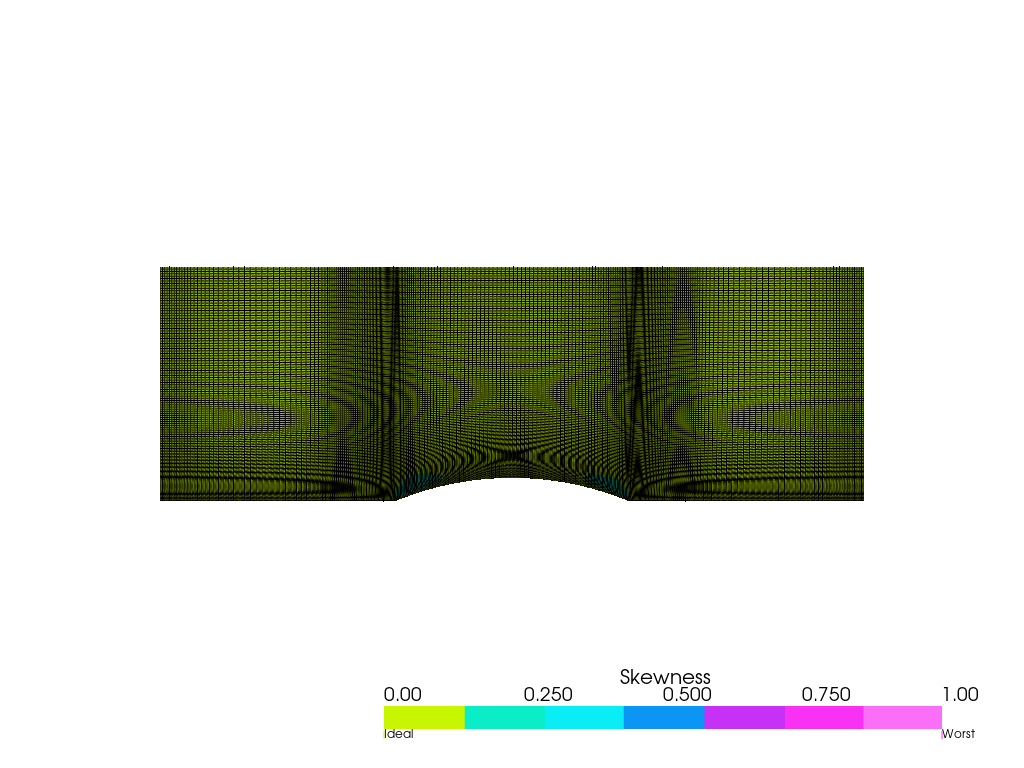

In [31]:
mesh=pv.PolyData(points, cells)
mesh.cell_data['Skewness']= Skewness

# Define the colors we want to use
green = np.array([200/256, 247/256, 0/256, 1])
greenblue = np.array([12/256, 238/256, 200/256, 1])
blue = np.array([12/256, 238/256, 246/256, 1])
darkblue = np.array([12/256, 150/256, 246/256, 1])
purple= np.array([200/256, 50/256, 246/256, 1])
pink= np.array([250/256, 50/256, 246/256, 1])
lightpink = np.array([250/256, 50/256, 246/256, 0.7])
orange = np.array([250/256, 150/256, 0/256, 0.7])
yelloworange = np.array([250/256, 200/256, 0/256, 0.7])
yellow = np.array([255/256, 247/256, 0/256, 1])
grey = np.array([189/256, 189/256, 189/256, 1])

skewness = np.linspace(mesh['Skewness'].min(), mesh['Skewness'].max(), 256)
newcolors = np.empty((256, 4))
newcolors[skewness >= 0] = green
#newcolors[skewness > 0.1] = lightgreen
newcolors[skewness > 0.1] = greenblue
newcolors[skewness > 0.2] = blue
newcolors[skewness > 0.3] = darkblue
newcolors[skewness > 0.4] = purple
newcolors[skewness > 0.5] = pink
newcolors[skewness > 0.6] = lightpink
newcolors[skewness > 0.7] = orange
newcolors[skewness > 0.8] = yelloworange
newcolors[skewness > 0.9] = yellow
newcolors[skewness >= 1] = grey

my_colormap = ListedColormap(newcolors)
annotations = {
    1: "Worst",
    0: "Ideal",
}

pl = pv.Plotter()
pl.set_background('white')
pv.global_theme.font.color = 'black'
pl.add_mesh(mesh, show_edges=True, line_width=0.5,scalars='Skewness',
            cmap=my_colormap, annotations=annotations,clim=[0, 1])
pl.camera_position = 'xy'
pl.show()